In [1]:
import pandas as pd
#Problem Statement:To predict whether income of an individual is below or above 50k based on weighted census data extracted from the 1994-1995 current population service conducted by the USA Census beaurau which contains 41 demographic and employment related variables

In [2]:
df = pd.read_csv("C://Users//Sambit//Downloads//Income Census Data.csv")
#Here we have loaded the CSV File we have received from UC IrvineMachine learning depositry.
#we have made some major changes into the data, as the data provided to us had too many issues in it, thus before using the data we had to clean the data properly.

In [3]:
df.head()
#We used it to get a breif Idea about the data and the headings and also the parameteres each variables has

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu last week,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionaire for veteran's admin,veterans benefits,weeks worked in year,94 or 95,below or above $50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,Below $50k
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,Below $50k
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,Below $50k
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,Below $50k
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,Below $50k


In [4]:
df.describe()
#we used this code to get a breif description about the Data, the total count, mean, standard deviation, minimum value, maximum value and quartiles

,age,industry code,occupation code,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,94 or 95
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [5]:
df.info()
#This method is useful for quickly understanding the basic structure and contents of your DataFrame, such as identifying missing values and data types. from this we understood what are the problematic data , having null values and also we got a breif idea about what variables we can drop in the next step.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class of worker                            199523 non-null  object 
 2   industry code                              199523 non-null  int64  
 3   occupation code                            199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage per hour                              199523 non-null  int64  
 6   enrolled in edu last week                  199523 non-null  object 
 7   marital status                             199523 non-null  object 
 8   major industry code                        199523 non-null  object 
 9   major occupation code                      199523 non-null  object 
 10  race    

In [6]:
df.isna().sum()
#Getting the sum of the count of the null values of each variables.

age                                              0
class of worker                                  0
industry code                                    0
occupation code                                  0
education                                        0
wage per hour                                    0
enrolled in edu last week                        0
marital status                                   0
major industry code                              0
major occupation code                            0
race                                             0
hispanic origin                                  0
sex                                              0
member of a labor union                          0
reason for unemployment                          0
full or part time employment stat                0
capital gains                                    0
capital losses                                   0
dividends from stocks                            0
tax filer status               

In [7]:
df.columns
#getting the coloumn names

Index(['age', 'class of worker', 'industry code', 'occupation code',
       'education', 'wage per hour', 'enrolled in edu last week',
       'marital status', 'major industry code', 'major occupation code',
       'race', 'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer status', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or sel

In [8]:
df.drop(['migration code-change in msa', 'migration code-change in reg','migration code-move within reg','migration prev res in sunbelt','country of birth father','country of birth mother', 'country of birth self','94 or 95'],inplace=True,axis=1)
#Dropping the problematic and irrelevant variables, which has no such major implication on the dependent variable.

In [9]:
df.isna().sum()
#Getting the sum of the count of the null values of each variables.

age                                            0
class of worker                                0
industry code                                  0
occupation code                                0
education                                      0
wage per hour                                  0
enrolled in edu last week                      0
marital status                                 0
major industry code                            0
major occupation code                          0
race                                           0
hispanic origin                                0
sex                                            0
member of a labor union                        0
reason for unemployment                        0
full or part time employment stat              0
capital gains                                  0
capital losses                                 0
dividends from stocks                          0
tax filer status                               0
region of previous r

In [10]:
(df['state of previous residence'].mode())
#To find the mode of 'state of previous residence'

0     Not in universe
Name: state of previous residence, dtype: object

In [11]:
df['state of previous residence'].fillna('Not in universe',inplace=True)
#Replace the null values in this variable with the mode of 'state of previous residence' with 'Not in universe'

C:\Users\Sambit\AppData\Local\Temp\ipykernel_21360\1223528742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['state of previous residence'].fillna('Not in universe',inplace=True)


In [12]:
df.isna().sum()
#Getting the sum of the count of the null values of each variables after replacing the null variables of state of previous residence with mode variable

age                                          0
class of worker                              0
industry code                                0
occupation code                              0
education                                    0
wage per hour                                0
enrolled in edu last week                    0
marital status                               0
major industry code                          0
major occupation code                        0
race                                         0
hispanic origin                              0
sex                                          0
member of a labor union                      0
reason for unemployment                      0
full or part time employment stat            0
capital gains                                0
capital losses                               0
dividends from stocks                        0
tax filer status                             0
region of previous residence                 0
state of prev

In [13]:
from sklearn.preprocessing import LabelEncoder
#importing label encoder which will help in converting the categorical data into numerical data, so that we can make proper analysis

In [14]:
le = LabelEncoder()
#creating an instance of label encoder

In [15]:
df['class of worker_Encoded']=le.fit_transform(df['class of worker'])

In [16]:
df['education_Encoded']=le.fit_transform(df['education'])

In [17]:
df['enrolled in edu last week_Encoded']=le.fit_transform(df['enrolled in edu last week'])

In [18]:
df['marital status_Encoded']=le.fit_transform(df['marital status'])

In [19]:
df['major industry code_Encoded']=le.fit_transform(df['major industry code'])

In [20]:
df['major occupation code_Encoded']=le.fit_transform(df['major occupation code'])

In [21]:
df['race_Encoded']=le.fit_transform(df['race'])

In [22]:
df['hispanic origin_Encoded']=le.fit_transform(df['hispanic origin'])

In [23]:
df['sex_Encoded']=le.fit_transform(df['sex'])

In [24]:
df['member of a labor union_Encoded']=le.fit_transform(df['member of a labor union'])

In [25]:
df['reason for unemployment_Encoded']=le.fit_transform(df['reason for unemployment'])

In [26]:
df['full or part time employment stat_Encoded']=le.fit_transform(df['full or part time employment stat'])

In [27]:
df['tax filer status_Encoded']=le.fit_transform(df['tax filer status'])

In [28]:
df['region of previous residence_Encoded']=le.fit_transform(df['region of previous residence'])

In [29]:
df['state of previous residence_Encoded']=le.fit_transform(df['state of previous residence'])

In [30]:
df['detailed household and family stat_Encoded']=le.fit_transform(df['detailed household and family stat'])

In [31]:
df['detailed household summary in household_Encoded']=le.fit_transform(df['detailed household summary in household'])

In [32]:
df['live in this house 1 year ago_Encoded']=le.fit_transform(df['live in this house 1 year ago'])

In [33]:
df['family members under 18_Encoded']=le.fit_transform(df['family members under 18'])

In [34]:
df['citizenship_Encoded']=le.fit_transform(df['citizenship'])

In [35]:
df['fill inc questionaire for veteran\'s admin_Encoded']= le.fit_transform(df['fill inc questionaire for veteran\'s admin'])

In [36]:
df['below or above $50k_Encoded']= le.fit_transform(df['below or above $50k'])

In [37]:
df.head()
#Checking the dataframe again to check whether the categorical values have been converted to numeric variables so that the machine learning program is able to read 

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu last week,marital status,major industry code,major occupation code,...,tax filer status_Encoded,region of previous residence_Encoded,state of previous residence_Encoded,detailed household and family stat_Encoded,detailed household summary in household_Encoded,live in this house 1 year ago_Encoded,family members under 18_Encoded,citizenship_Encoded,fill inc questionaire for veteran's admin_Encoded,below or above $50k_Encoded
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,4,3,35,24,6,1,4,4,1,1
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,0,4,4,20,4,0,4,4,1,1
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,4,3,35,2,0,1,4,0,1,1
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,4,3,35,8,2,2,0,4,1,1
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,4,3,35,8,2,2,0,4,1,1


In [38]:
from sklearn.preprocessing import StandardScaler
#We import StandardScaler from sklearn.preprocessing for standardizing features by removing the mean and scaling all the varibles to unit variance

In [39]:
ss = StandardScaler()
#creating an instance of standard scaler

In [40]:
df['age'] = ss.fit_transform(df[['age']])

In [41]:
df['wage per hour'] = ss.fit_transform(df[['wage per hour']])

In [42]:
df['capital gains'] = ss.fit_transform(df[['capital gains']])

In [43]:
df['capital losses'] = ss.fit_transform(df[['capital losses']])

In [44]:
df['dividends from stocks'] = ss.fit_transform(df[['dividends from stocks']])

In [45]:
df['instance weight'] = ss.fit_transform(df[['instance weight']])

In [46]:
df.head()
#We have checked the encoded data again using the above code

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu last week,marital status,major industry code,major occupation code,...,tax filer status_Encoded,region of previous residence_Encoded,state of previous residence_Encoded,detailed household and family stat_Encoded,detailed household summary in household_Encoded,live in this house 1 year ago_Encoded,family members under 18_Encoded,citizenship_Encoded,fill inc questionaire for veteran's admin_Encoded,below or above $50k_Encoded
0,1.725879,Not in universe,0,0,High school graduate,-0.201629,Not in universe,Widowed,Not in universe or children,Not in universe,...,4,3,35,24,6,1,4,4,1,1
1,1.053560,Self-employed-not incorporated,4,34,Some college but no degree,-0.201629,Not in universe,Divorced,Construction,Precision production craft & repair,...,0,4,4,20,4,0,4,4,1,1
2,-0.739291,Not in universe,0,0,10th grade,-0.201629,High school,Never married,Not in universe or children,Not in universe,...,4,3,35,2,0,1,4,0,1,1
3,-1.142682,Not in universe,0,0,Children,-0.201629,Not in universe,Never married,Not in universe or children,Not in universe,...,4,3,35,8,2,2,0,4,1,1
4,-1.097861,Not in universe,0,0,Children,-0.201629,Not in universe,Never married,Not in universe or children,Not in universe,...,4,3,35,8,2,2,0,4,1,1


In [47]:
df.columns
#checking the column names 

Index(['age', 'class of worker', 'industry code', 'occupation code',
       'education', 'wage per hour', 'enrolled in edu last week',
       'marital status', 'major industry code', 'major occupation code',
       'race', 'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer status', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'live in this house 1 year ago', 'num persons worked for employer',
       'family members under 18', 'citizenship',
       'own business or self employed',
       'fill inc questionaire for veteran's admin', 'veterans benefits',
       'weeks worked in year', 'below or above $50k',
       'class of worker_Encoded', 'education_Encoded',
       'enrolled in edu last week_En

In [48]:
from sklearn.model_selection import train_test_split

y=df['below or above $50k_Encoded']
x = df[['age','industry code', 'occupation code','industry code', 'occupation code','capital gains', 'capital losses', 'dividends from stocks','instance weight','num persons worked for employer','own business or self employed','veterans benefits','class of worker_Encoded', 'education_Encoded','enrolled in edu last week_Encoded', 'marital status_Encoded','major industry code_Encoded', 'major occupation code_Encoded','race_Encoded', 'hispanic origin_Encoded', 'sex_Encoded','member of a labor union_Encoded', 'reason for unemployment_Encoded','full or part time employment stat_Encoded', 'tax filer status_Encoded','region of previous residence_Encoded','state of previous residence_Encoded','detailed household and family stat_Encoded','detailed household summary in household_Encoded','live in this house 1 year ago_Encoded','family members under 18_Encoded', 'citizenship_Encoded','fill inc questionaire for veteran\'s admin_Encoded','weeks worked in year']]
# Define the target variable 'y' as the encoded below or above $50k and the feature variables 'x' as a subset of the DataFrame containing various demographic variablres

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
#Split the data into training and testing sets with 30% of the data allocated to the test set, ensuring stratification based on the target variable 'y' for balanced class distribution

In [50]:
from sklearn.tree import DecisionTreeClassifier as dtree
#Import the DecisionTreeClassifier from sklearn.tree to create a decision tree model for classification tasks

In [51]:
dt = dtree()
#Create an instance of the DecisionTreeClassifier for building a decision tree model for classification

In [52]:
X_train.head()
#Display the first few rows of the training feature set 'X_train' to inspect its structure and contents

,age,industry code,occupation code,industry code,occupation code,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,...,tax filer status_Encoded,region of previous residence_Encoded,state of previous residence_Encoded,detailed household and family stat_Encoded,detailed household summary in household_Encoded,live in this house 1 year ago_Encoded,family members under 18_Encoded,citizenship_Encoded,fill inc questionaire for veteran's admin_Encoded,weeks worked in year
22694,0.919096,13,35,13,35,-0.092542,-0.137236,-0.049154,-0.137387,6,...,2,3,35,20,4,1,4,1,1,52
31497,-1.142682,0,0,0,0,-0.092542,-0.137236,-0.099553,-0.046641,0,...,4,3,35,8,2,1,0,4,1,0
89001,1.322487,35,17,35,17,-0.092542,-0.137236,-0.099553,0.112733,3,...,2,3,35,37,7,1,4,4,1,52
198682,0.201956,37,5,37,5,-0.092542,-0.137236,-0.099553,0.946279,6,...,2,3,35,20,4,1,4,4,1,52
139921,0.022671,19,36,19,36,-0.092542,-0.137236,-0.099553,0.693936,6,...,2,3,35,20,4,1,4,4,1,52


In [53]:
Y_train.head()
#Display the first five values of the training target variable 'Y_train' to inspect its contents and verify the data

22694     0
31497     1
89001     0
198682    0
139921    1
Name: below or above $50k_Encoded, dtype: int32

In [54]:
dt.fit(X_train,Y_train)
#Train the DecisionTreeClassifier model on the training feature set 'X_train' and target variable 'Y_train'

DecisionTreeClassifier()

In [55]:
y_pred = dt.predict(X_test)
#Predict the target variable for the test feature set 'X_test' using the trained DecisionTreeClassifier model

In [56]:
y_pred
#Display the predicted values for the target variable based on the test feature set 'X_test'

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
Y_test
#Display the actual values of the target variable for the test feature set 'X_test' for comparison with pred

27874     1
47548     1
108506    1
124580    1
127427    1
         ..
154918    1
103168    1
173359    1
60355     1
136144    1
Name: below or above $50k_Encoded, Length: 59857, dtype: int32

In [58]:
import pandas as pd
feature_imp = pd.Series(dt.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp
# We Import pandas as pd and calculate feature importances from the trained DecisionTreeClassifier model
# We Create a Series with feature names as the index and their importance scores as values, then sort the features by importance in descending order
# Here we can see that Instance weight has the most impact on above or below $50k followed by Capital gains, and family member under 18 has the least impact on the above or below $50k

instance weight                                      0.126271
capital gains                                        0.124161
age                                                  0.096660
dividends from stocks                                0.095298
weeks worked in year                                 0.063294
education_Encoded                                    0.045456
occupation code                                      0.044913
occupation code                                      0.042074
sex_Encoded                                          0.040831
major industry code_Encoded                          0.035566
capital losses                                       0.029109
num persons worked for employer                      0.027673
industry code                                        0.026841
industry code                                        0.026463
class of worker_Encoded                              0.020457
full or part time employment stat_Encoded            0.019846
tax file

In [59]:
df.drop(['citizenship_Encoded','race_Encoded','detailed household summary in household_Encoded','live in this house 1 year ago_Encoded','hispanic origin_Encoded','state of previous residence_Encoded','region of previous residence_Encoded','reason for unemployment_Encoded','fill inc questionaire for veteran\'s admin_Encoded','veterans benefits','enrolled in edu last week_Encoded','family members under 18_Encoded'],inplace=True,axis=1)
# All the variables whose beta is more than 0.01 have been taken into consideration and the other below 0.01 are dropped 

In [60]:
df.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu last week,marital status,major industry code,major occupation code,...,education_Encoded,marital status_Encoded,major industry code_Encoded,major occupation code_Encoded,sex_Encoded,member of a labor union_Encoded,full or part time employment stat_Encoded,tax filer status_Encoded,detailed household and family stat_Encoded,below or above $50k_Encoded
0,1.725879,Not in universe,0,0,High school graduate,-0.201629,Not in universe,Widowed,Not in universe or children,Not in universe,...,12,6,14,6,0,1,2,4,24,1
1,1.053560,Self-employed-not incorporated,4,34,Some college but no degree,-0.201629,Not in universe,Divorced,Construction,Precision production craft & repair,...,16,0,4,8,1,1,0,0,20,1
2,-0.739291,Not in universe,0,0,10th grade,-0.201629,High school,Never married,Not in universe or children,Not in universe,...,0,4,14,6,0,1,2,4,2,1
3,-1.142682,Not in universe,0,0,Children,-0.201629,Not in universe,Never married,Not in universe or children,Not in universe,...,10,4,14,6,0,1,0,4,8,1
4,-1.097861,Not in universe,0,0,Children,-0.201629,Not in universe,Never married,Not in universe or children,Not in universe,...,10,4,14,6,0,1,0,4,8,1


In [61]:
df.columns

Index(['age', 'class of worker', 'industry code', 'occupation code',
       'education', 'wage per hour', 'enrolled in edu last week',
       'marital status', 'major industry code', 'major occupation code',
       'race', 'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer status', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'live in this house 1 year ago', 'num persons worked for employer',
       'family members under 18', 'citizenship',
       'own business or self employed',
       'fill inc questionaire for veteran's admin', 'weeks worked in year',
       'below or above $50k', 'class of worker_Encoded', 'education_Encoded',
       'marital status_Encoded', 'major industry code_Encoded',


In [62]:
y=df['below or above $50k_Encoded']
x = df[['age','industry code', 'occupation code','industry code', 'occupation code','capital gains', 'capital losses', 'dividends from stocks','instance weight','num persons worked for employer','own business or self employed','class of worker_Encoded', 'education_Encoded', 'marital status_Encoded','major industry code_Encoded', 'major occupation code_Encoded', 'sex_Encoded','member of a labor union_Encoded','full or part time employment stat_Encoded', 'tax filer status_Encoded','detailed household and family stat_Encoded','weeks worked in year']]

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
#70% training part
#Split the data into training and testing sets with 30% of the data allocated to the test set, ensuring stratificat based on the target variable 'y' for balanced class distributionion 

In [64]:
dt1 = dtree()
#Create an instance of the DecisionTreeClassifier for building a decision tree model for classification

In [65]:
X_train.head()
# Display the first few rows of the training feature set 'X_train' to inspect its structure and contents

,age,industry code,occupation code,industry code,occupation code,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,...,education_Encoded,marital status_Encoded,major industry code_Encoded,major occupation code_Encoded,sex_Encoded,member of a labor union_Encoded,full or part time employment stat_Encoded,tax filer status_Encoded,detailed household and family stat_Encoded,weeks worked in year
22694,0.919096,13,35,13,35,-0.092542,-0.137236,-0.049154,-0.137387,6,...,16,2,10,8,1,1,1,2,20,52
31497,-1.142682,0,0,0,0,-0.092542,-0.137236,-0.099553,-0.046641,0,...,10,4,14,6,0,1,0,4,8,0
89001,1.322487,35,17,35,17,-0.092542,-0.137236,-0.099553,0.112733,3,...,9,2,7,12,1,1,1,2,37,52
198682,0.201956,37,5,37,5,-0.092542,-0.137236,-0.099553,0.946279,6,...,9,2,2,10,1,0,1,2,20,52
139921,0.022671,19,36,19,36,-0.092542,-0.137236,-0.099553,0.693936,6,...,12,2,11,5,1,1,1,2,20,52


In [66]:
Y_train.head()
#Display the first five values of the training target variable 'Y_train' to inspect its contents and verify the data

22694     0
31497     1
89001     0
198682    0
139921    1
Name: below or above $50k_Encoded, dtype: int32

In [67]:
dt1.fit(X_train,Y_train)
#Train the DecisionTreeClassifier model on the training feature set 'X_train' and target variable 'Y_train' and here instead of dt we have taken dt1 because we have dropped many variables 

DecisionTreeClassifier()

In [68]:
y_pred4 = dt1.predict(X_test)
#Predict the target variable for the test feature set 'X_test' using the trained DecisionTreeClassifier model

In [69]:
y_pred4
#Display the predicted values for the target variable based on the test feature set 'X_test'

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
Y_test
#Display the actual values of the target variable for the test feature set 'X_test' for comparison with pred

27874     1
47548     1
108506    1
124580    1
127427    1
         ..
154918    1
103168    1
173359    1
60355     1
136144    1
Name: below or above $50k_Encoded, Length: 59857, dtype: int32

In [71]:
import pandas as pd
feature_imp = pd.Series(dt1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp
#We Import pandas as pd and calculate feature importances from the trained DecisionTreeClassifier model
#We Create a Series with feature names as the index and their importance scores as values, then sort the features by importance in descending order
#Here we can see that Instance weight has the most impact on above or below $50k followed by Capital gains, and family member under 18 has the least impact on the above or below $50k

instance weight                               0.142740
capital gains                                 0.124913
age                                           0.105994
dividends from stocks                         0.095396
weeks worked in year                          0.065244
occupation code                               0.060446
education_Encoded                             0.051121
sex_Encoded                                   0.040893
major industry code_Encoded                   0.034139
num persons worked for employer               0.032786
occupation code                               0.029542
capital losses                                0.029434
industry code                                 0.028084
industry code                                 0.026423
full or part time employment stat_Encoded     0.026214
class of worker_Encoded                       0.020438
detailed household and family stat_Encoded    0.019658
tax filer status_Encoded                      0.016668
major occu

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
#Initialize the RandomForestClassifier with 100 trees (estimators)
#The n_estimators parameter specifies the number of trees in the forest

In [73]:
clf1.fit(X_train,Y_train)
#Fit the RandomForestClassifier model on the training data
#X_train contains the feature data, and y_train contains the corresponding labels

RandomForestClassifier()

In [74]:
y_pred1=clf1.predict(X_test)
#Use the trained RandomForestClassifier model to make predictions on the test data
#X_test contains the feature data for which predictions are to be made
#y_pred1 will hold the predicted labels for each observation in X_test

In [75]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier as dtree
dt=dtree()
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Import pyplot from matplotlib for visualizing plots and charts, confusion_matrix to compute the confusion matrix for evaluating classification performance, DecisionTreeClassifier as dtree for creating and training a decision tree model, plot_tree to visualize the structure of the decision tree and accuracy_score, precision_score, recall_score, and f1_score to evaluate model performance with various metrics

In [76]:
df['below or above $50k_Encoded'].value_counts()
#To get the deatils of the rows and columns

below or above $50k_Encoded
1    187141
0     12382
Name: count, dtype: int64

In [77]:
confusion_matrix(Y_test, y_pred1)
#To Compute the confusion matrix to evaluate the performance of the model by comparing the actual target values 'Y_test' with the predicted values 'y_pred'

array([[ 1593,  2122],
       [  589, 55553]], dtype=int64)

In [78]:
print(classification_report(Y_test, y_pred1))
#Print a detailed classification report to evaluate the performance of the model.

              precision    recall  f1-score   support

           0       0.73      0.43      0.54      3715
           1       0.96      0.99      0.98     56142

    accuracy                           0.95     59857
   macro avg       0.85      0.71      0.76     59857
weighted avg       0.95      0.95      0.95     59857



In [79]:
accuracy_score(Y_test, y_pred1)
#To calculate and print the accuracy of the model
#Accuracy is the ratio of correctly predicted observations to the total observations

0.9547087224551849

In [80]:
precision_score(Y_test, y_pred1)
#Calculate and print the precision of the model
#Precision is the ratio of true positive observations to the total predicted positives

0.9632076289553533

In [81]:
recall_score(Y_test, y_pred1)
#Calculate and print the recall of the model
#Recall is the ratio of true positive observations to the total actual positives (true positives + false negatives)

0.9895087456805957

In [82]:
f1_score(Y_test, y_pred1)
#Calculate and print the F1 score of the model
#The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics

0.9761810625829181

In [83]:
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

instance weight                               0.111605
age                                           0.104050
capital gains                                 0.093555
dividends from stocks                         0.088806
occupation code                               0.063637
occupation code                               0.059818
education_Encoded                             0.053726
num persons worked for employer               0.046709
industry code                                 0.043215
industry code                                 0.041649
weeks worked in year                          0.038843
sex_Encoded                                   0.035131
major industry code_Encoded                   0.028483
capital losses                                0.028256
full or part time employment stat_Encoded     0.026637
detailed household and family stat_Encoded    0.025046
class of worker_Encoded                       0.024382
major occupation code_Encoded                 0.020520
tax filer 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


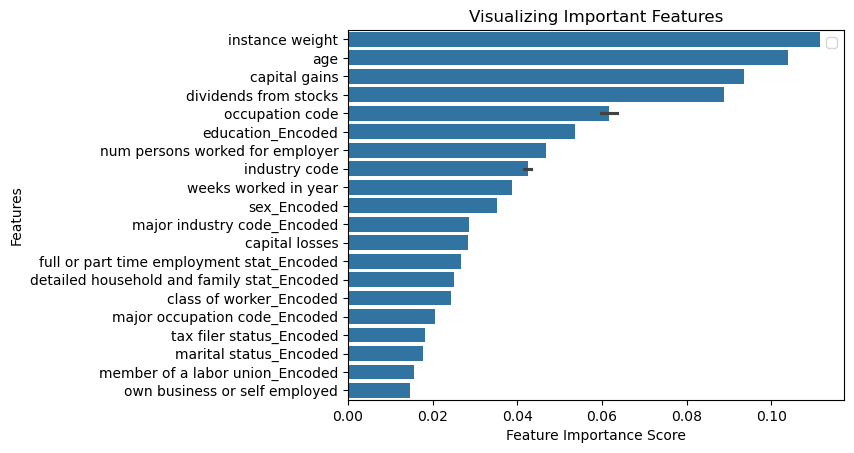

In [93]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [151]:
from sklearn.tree import plot_tree
# import the plot_tree function from the scikit-learn library to visualize decision trees

In [163]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt1, max_depth = 1,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age','industry code', 'occupation code','industry code', 'occupation code','capital gains', 'capital losses', 'dividends from stocks','instance weight','num persons worked for employer','own business or self employed','class of worker_Encoded', 'education_Encoded', 'marital status_Encoded','major industry code_Encoded', 'major occupation code_Encoded', 'sex_Encoded','member of a labor union_Encoded','full or part time employment stat_Encoded', 'tax filer status_Encoded','detailed household and family stat_Encoded','weeks worked in year'],
            class_names = ["0","1"]
              )
#Create a subplot with 1 row and 1 column, set the figure size and resolution
#Plot the decision tree using the plot_tree function
# Draw the tree up to a depth of 1
               rounded=True,  # Use rounded boxes for nodes
               filled=True,  # Fill the nodes with colors to indicate class
               impurity=True,  # Display the impurity (e.g., Gini impurity) of each node
               node_ids=True,  # Display the node IDs

IndentationError: unexpected indent (3837776733.py, line 15)

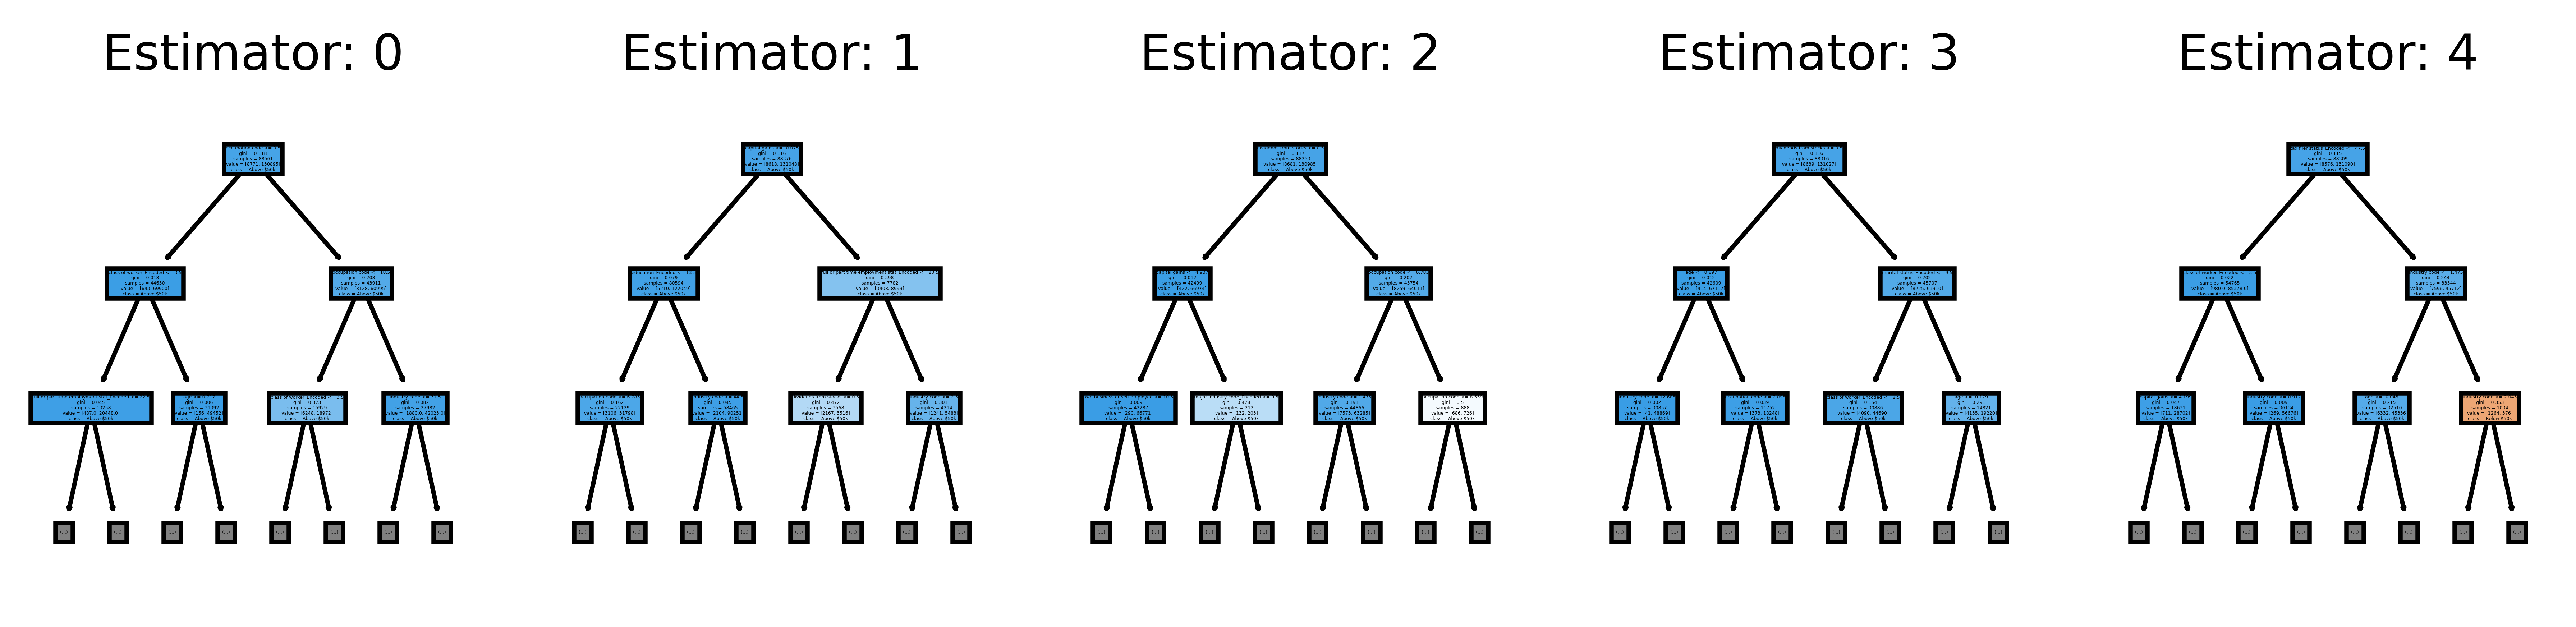

In [167]:
import matplotlib.pyplot as plt
from sklearn import tree  # Import the tree module

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names=['age', 'industry code', 'occupation code', 'industry code', 'occupation code','capital gains', 'capital losses', 'dividends from stocks', 'instance weight','num persons worked for employer', 'own business or self employed', 'class of worker_Encoded','education_Encoded', 'marital status_Encoded', 'major industry code_Encoded','major occupation code_Encoded', 'sex_Encoded', 'member of a labor union_Encoded','full or part time employment stat_Encoded', 'tax filer status_Encoded','detailed household and family stat_Encoded', 'weeks worked in year'], 
                   class_names=["Below $50k", "Above $50k"],
                   filled=True,
                   ax=axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize=11)

plt.show()

#Create a subplot with 1 row and 5 columns, set the figure size to 10x2 inches, and resolution to 900 DPI
#We loop through the first 5 estimators (trees) in the RandomForestClassifier  

In [101]:
from sklearn.neighbors import KNeighborsClassifier
#Create an instance of KNeighborsClassifier
#n_neighbors specifies the number of neighbors to use by default for k-neighbors queries

In [103]:
from matplotlib import pyplot as plt
#Import the pyplot module from matplotlib for plotting

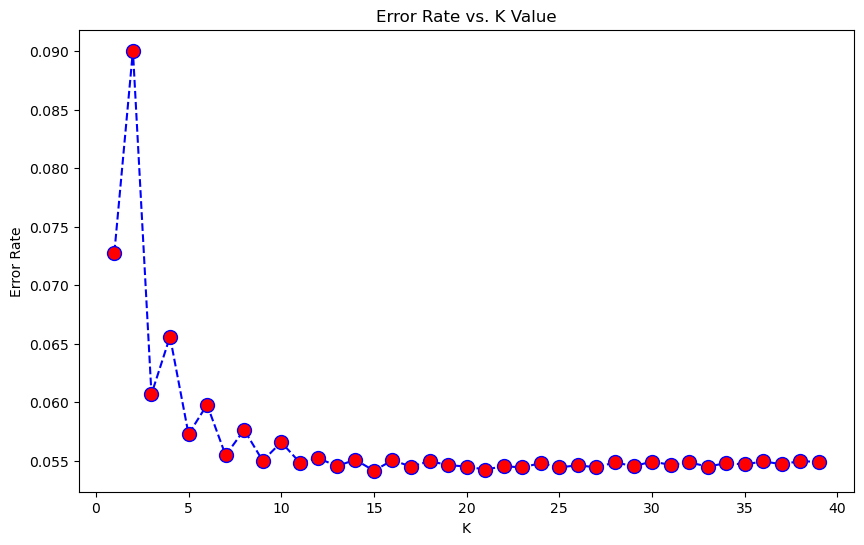

Minimum error:- 0.05412900746779825 at K = 15


In [105]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(Y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [107]:
knn = KNeighborsClassifier(n_neighbors=15)
#When K is 15, error rate is the minimum

In [109]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [111]:
y_pred2 = knn.predict(X_test)
#Predict the target labels for the test data using the trained K-Nearest Neighbors model
#X_test contains the feature values for the test data
#y_pred2 will contain the predicted target labels for the test data

In [112]:
print ("kNN Classifier")
print("accuracy: ",accuracy_score(y_pred2,Y_test), "precision: ", precision_score(y_pred2,Y_test), "recall: ", recall_score(y_pred2,Y_test), "F1 score: ", f1_score(y_pred2,Y_test))

kNN Classifier
accuracy:  0.9458709925322017 precision:  0.9884400270742046 recall:  0.9553921906204806 F1 score:  0.9716351793812267


In [117]:
from sklearn.model_selection import train_test_split


In [119]:
y=df['below or above $50k_Encoded']
x = df[['age','industry code', 'occupation code','capital gains', 'capital losses', 'dividends from stocks','instance weight','num persons worked for employer','own business or self employed','class of worker_Encoded', 'education_Encoded', 'marital status_Encoded','major industry code_Encoded', 'major occupation code_Encoded', 'sex_Encoded','member of a labor union_Encoded','full or part time employment stat_Encoded', 'tax filer status_Encoded','detailed household and family stat_Encoded','weeks worked in year']]

In [121]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [125]:
df.dtypes

age                                           float64
class of worker                                object
industry code                                   int64
occupation code                                 int64
education                                      object
wage per hour                                 float64
enrolled in edu last week                      object
marital status                                 object
major industry code                            object
major occupation code                          object
race                                           object
hispanic origin                                object
sex                                            object
member of a labor union                        object
reason for unemployment                        object
full or part time employment stat              object
capital gains                                 float64
capital losses                                float64
dividends from stocks       

In [129]:
#Import XGBoost
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

Y_pred3=model.predict(X_test)
#Create an instance of the XGBClassifier
#XGBClassifier is a machine learning model that uses gradient boosting on decision trees

In [131]:
model.fit(X_train,Y_train)
#Fit the XGBoost model to the training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
y_pred3 = model.predict(X_test)
#Predict the target labels for the test data using the trained XGBoost model
# X_test contains the feature values for the test data
#Y_pred3 will contain the predicted target labels for the test data

In [135]:
print ("XGBoost Classifier")
print("accuracy: ",accuracy_score(y_pred3,Y_test), "precision: ", precision_score(y_pred3,Y_test), "recall: ", recall_score(y_pred3,Y_test), "F1 score: ", f1_score(y_pred3,Y_test))

XGBoost Classifier
accuracy:  0.9572481079907113 precision:  0.9889031384703074 recall:  0.9663040640501261 F1 score:  0.9774729966460382


In [ ]:
#All the three (Random forest Classifier, KNN Classifier and XGBoost Classifier) perform efficiently with little differences in F1 Score. 
#Accuracy will not be taken into consideration beacuse data is biased

In [195]:
#Now we are 

import chardet

# Detect encoding
with open("C://Users//Sambit//Downloads//New_Data_Income (2).csv", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read the CSV file with detected encoding
new_data = pd.read_csv("C://Users//Sambit//Downloads//New_Data_Income (2).csv", encoding=encoding)


In [197]:
new_data

,age,industry code,occupation code,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,class of worker_Encoded,education_Encoded,marital status_Encoded,major industry code_Encoded,major occupation code_Encoded,sex_Encoded,member of a labor union_Encoded,full or part time employment stat_Encoded,tax filer status_Encoded,detailed household and family stat_Encoded,weeks worked in year
0,51,4,34,0,0,0,2441.22,3,0,4,7,1,0,9,0,0,3,0,1,52
1,46,37,31,0,1590,0,978.16,6,0,5,5,1,8,8,1,0,4,2,3,52
2,13,0,0,0,0,0,1520.08,0,0,8,3,3,3,1,1,1,2,5,3,0
3,39,0,0,0,0,0,1274.04,0,0,2,0,2,14,8,0,2,5,3,2,0
4,12,0,0,0,0,0,455.02,0,0,3,1,4,14,6,0,2,7,1,0,0


In [199]:
clf1.predict(new_data)
#predicted the target variable for new data using the trend RandomforestClassifier Model

array([1, 1, 1, 1, 1])